# Fault Detection in Induction Motor using Deep Learning
## Case : With Sufficient Data

#### Dataset: [Induction Motor Faults dataset](https://www.kaggle.com/uysalserkan/fault-induction-motor-dataset)

## Importing Data

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = '/kaggle/input/fault-induction-motor-dataset/imbalance/'

In [ ]:
normal_file_names = glob.glob("/kaggle/input/fault-induction-motor-dataset/normal/"+'/normal/*.csv')
imnormal_file_names_6g = glob.glob(path+'/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(path+'/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(path+'/imbalance/15g/*.csv')
imnormal_file_names_20g = glob.glob(path+'/imbalance/20g/*.csv')
imnormal_file_names_25g = glob.glob(path+'/imbalance/25g/*.csv')
imnormal_file_names_30g = glob.glob(path+'/imbalance/30g/*.csv')

In [ ]:
# defining data reader
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [ ]:
data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

In [ ]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
dtypes: float64(8)
memory usage: 747.7 MB


#### Down Sampling

In [ ]:
# Down Sampling
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased._append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [ ]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)

In [ ]:
data_n

,0,1,2,3,4,5,6,7
0,0.068100,0.011065,0.017430,0.001620,-0.059850,0.000868,-0.088720,0.010209
1,-0.045139,0.015286,-0.010404,-0.000644,0.426827,0.005168,0.155058,0.013550
2,-0.064635,0.029477,0.002314,0.001339,0.232491,0.005660,0.390845,0.009958
3,0.089400,-0.002910,0.002770,-0.002331,-0.116512,-0.003224,0.219854,0.012501
4,-0.070240,0.008164,-0.012449,0.002579,0.367824,0.008202,0.343822,0.010695
...,...,...,...,...,...,...,...,...
2445,0.014942,0.010274,0.000469,0.002580,0.138325,0.026142,0.336499,0.009176
2446,-0.078864,0.016197,0.001844,-0.000609,0.105457,0.016553,0.583317,0.011419
2447,-0.026635,0.000749,0.000612,0.002510,0.044352,0.010177,0.540934,0.012321
2448,0.016440,-0.018926,-0.010451,-0.003154,-0.053072,-0.011704,0.407358,0.012750


#### FFT Convolution

In [ ]:
# Performing convolution
from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [ ]:
data_n = FFT(data_n)
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)

In [ ]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
33688,6
33689,6
33690,6
33691,6


In [ ]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)

In [ ]:
# final data
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.001828,0.001407,0.000633,0.000314,-0.018471,-0.006255,-0.023785,-0.004148,0.010819,0.001846,0.036653,-0.000102,0.021376,-0.003523,0.000117
1,-0.000092,-0.001432,-0.000654,-0.000817,0.017794,0.004692,0.043053,0.006219,-0.091761,-0.015580,-0.162975,-0.005451,-0.074709,0.001488,0.000286
2,-0.004291,0.000600,0.000154,0.000394,0.036423,-0.008018,0.044729,0.006493,-0.079549,-0.016486,-0.024822,-0.011557,-0.080927,0.013979,0.000413
3,-0.002831,0.002876,-0.000647,-0.000118,-0.019607,-0.008133,-0.019475,0.023109,0.030703,0.006767,0.241628,-0.002068,0.137273,0.022686,0.000554
4,0.005883,-0.004571,0.000293,-0.000323,-0.018166,0.018915,0.011407,0.028656,-0.033670,-0.006434,0.141389,0.001693,0.277524,0.031725,0.000653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33688,0.012275,-0.003064,-0.033096,-0.097820,-0.001973,0.029366,0.110073,0.097736,0.583000,-0.000476,-0.165672,-0.050191,-2.189738,-0.110477,-0.000031
33689,-0.004604,0.023301,0.042960,0.068870,-0.007291,-0.043596,-0.064410,-0.066192,-0.423388,0.058740,-0.352882,-0.055839,-3.111675,-0.034305,-0.001241
33690,-0.003967,-0.042896,-0.041638,-0.035789,0.060471,0.085712,0.360720,0.414517,0.227751,-0.136313,-0.566647,-0.141545,-2.288712,-0.122844,-0.000350
33691,-0.002119,0.033678,0.034634,0.016815,-0.048608,-0.045720,-0.151028,-0.149389,-0.146872,0.056739,0.176578,0.031899,-0.069253,-0.029774,-0.000065


## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30, shuffle=True)

In [ ]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (23585, 15)
Shape of Test Data : (10108, 15)


## DNN Deep Learning
### Building Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Creating the model
early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-traina

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)


### Training DNN

In [ ]:
hist = model.fit(X_train , y_train , epochs=50, validation_split=0.2)

Epoch 1/50
590/590 [==============================] - 11s 4ms/step - loss: 1.5271 - accuracy: 0.3452 - val_loss: 1.2652 - val_accuracy: 0.4431
Epoch 2/50
590/590 [==============================] - 2s 4ms/step - loss: 1.2093 - accuracy: 0.4679 - val_loss: 1.0949 - val_accuracy: 0.5128
Epoch 3/50
590/590 [==============================] - 2s 4ms/step - loss: 1.0487 - accuracy: 0.5427 - val_loss: 0.9283 - val_accuracy: 0.5735
Epoch 4/50
590/590 [==============================] - 2s 4ms/step - loss: 0.8420 - accuracy: 0.6480 - val_loss: 0.6460 - val_accuracy: 0.7354
Epoch 5/50
590/590 [==============================] - 2s 4ms/step - loss: 0.6440 - accuracy: 0.7376 - val_loss: 0.5672 - val_accuracy: 0.7702
Epoch 6/50
590/590 [==============================] - 2s 4ms/step - loss: 0.5438 - accuracy: 0.7786 - val_loss: 0.5261 - val_accuracy: 0.7882
Epoch 7/50
590/590 [==============================] - 2s 4ms/step - loss: 0.4945 - accuracy: 0.7962 - val_loss: 0.4975 - val_accuracy: 0.7882
Epoch

### Plot training history

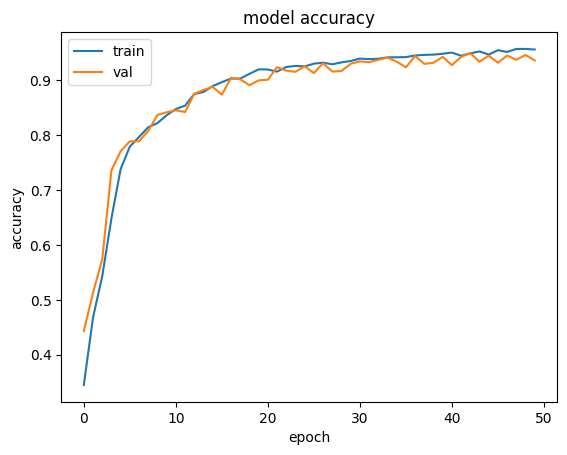

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

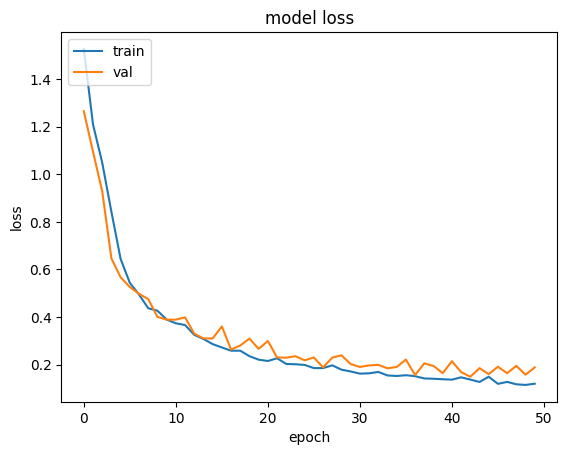

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## kNN Machine Learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 5) #n_neighbors = k

In [ ]:
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('knn Accuracy:',y_pred_knn)
print('Accuracy score using knn:',accuracy_score(y_test, y_pred_knn))
print('Classification report using knn',classification_report(y_test, y_pred_knn))
print('Confusion Matrix using knn',confusion_matrix(y_test, y_pred_knn))

knn Accuracy: [2 0 3 ... 1 2 1]
Accuracy score using knn: 0.6346458250890384
Classification report using knn               precision    recall  f1-score   support

           0       0.56      0.80      0.66      1441
           1       0.95      0.96      0.95      1494
           2       0.66      0.71      0.69      1426
           3       0.46      0.59      0.52      1440
           4       0.51      0.46      0.48      1480
           5       0.53      0.31      0.39      1401
           6       0.86      0.60      0.71      1426

    accuracy                           0.63     10108
   macro avg       0.65      0.63      0.63     10108
weighted avg       0.65      0.63      0.63     10108

Confusion Matrix using knn [[1154    2  217   36   18    9    5]
 [  35 1427    2    3   15    0   12]
 [ 344    2 1014   34   23    9    0]
 [ 173    6   89  854  187  115   16]
 [ 115   24   59  397  678  164   43]
 [ 163    8  128  408  207  428   59]
 [  71   38   20  143  207   87  860]]


## SVM Machine Learning

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)

In [ ]:
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('svm Accuracy:',y_pred_svm)
print('Accuracy score using svm:',accuracy_score(y_test, y_pred_svm))
print('Classification report using svm',classification_report(y_test, y_pred_svm))
print('Confusion Matrix using svm',confusion_matrix(y_test, y_pred_svm))

svm Accuracy: [2 5 3 ... 1 2 1]
Accuracy score using svm: 0.5485753858330036
Classification report using svm               precision    recall  f1-score   support

           0       0.50      0.55      0.53      1441
           1       0.56      0.99      0.72      1494
           2       0.73      0.61      0.66      1426
           3       0.40      0.36      0.38      1440
           4       0.45      0.39      0.42      1480
           5       0.42      0.20      0.27      1401
           6       0.70      0.73      0.71      1426

    accuracy                           0.55     10108
   macro avg       0.54      0.55      0.53     10108
weighted avg       0.54      0.55      0.53     10108

Confusion Matrix using svm [[ 794  296  232   60   19   22   18]
 [   6 1482    2    0    1    1    2]
 [ 370   90  866   38   11   41   10]
 [ 141  171   13  512  318  213   72]
 [  68  259    5  285  577  103  183]
 [ 166  157   52  375  214  277  160]
 [  30  191   16   13  134    5 1037]]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(n_estimators = 100)

In [ ]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('rf Accuracy:',y_pred_rf)
print('Accuracy score using rf:',accuracy_score(y_test, y_pred_rf))
print('Classification report using rf',classification_report(y_test, y_pred_rf))
print('Confusion Matrix using rf',confusion_matrix(y_test, y_pred_rf))

rf Accuracy: [2 0 2 ... 1 2 1]
Accuracy score using rf: 0.9821923229125445
Classification report using rf               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1441
           1       1.00      1.00      1.00      1494
           2       1.00      1.00      1.00      1426
           3       0.96      0.97      0.96      1440
           4       0.96      0.97      0.96      1480
           5       0.98      0.94      0.96      1401
           6       0.99      1.00      1.00      1426

    accuracy                           0.98     10108
   macro avg       0.98      0.98      0.98     10108
weighted avg       0.98      0.98      0.98     10108

Confusion Matrix using rf [[1439    0    0    0    0    2    0]
 [   0 1494    0    0    0    0    0]
 [   0    0 1424    0    2    0    0]
 [   2    0    0 1399   24   15    0]
 [   0    2    0   36 1431   10    1]
 [  10    0    4   24   38 1317    8]
 [   0    0    0    2    0    0 1424]]


## Comparison of Accuracy of Models

In [ ]:
print("For ANN binary classifier:")
print("\nDNN Accuracy on Train Data: {}".format(hist.history['accuracy'][-1]))
print("\nDNN Accuracy on Validation Data: {}".format(hist.history['val_accuracy'][-1]))
print("\nFor kNN:")
print('\nAccuracy score using knn:',accuracy_score(y_test, y_pred_knn))
print('\nClassification report using knn',classification_report(y_test, y_pred_knn))
print("\nFor SVM:")
print('\nAccuracy score using svm:',accuracy_score(y_test, y_pred_svm))
print('\nClassification report using svm',classification_report(y_test, y_pred_svm))
print("\nFor RF Classifier: ")
print('\nAccuracy score using rf:',accuracy_score(y_test, y_pred_rf))
print('\nClassification report using rf',classification_report(y_test, y_pred_rf))

For ANN binary classifier:

DNN Accuracy on Train Data: 0.9551621675491333

DNN Accuracy on Validation Data: 0.9353402853012085

For kNN:

Accuracy score using knn: 0.6346458250890384

Classification report using knn               precision    recall  f1-score   support

           0       0.56      0.80      0.66      1441
           1       0.95      0.96      0.95      1494
           2       0.66      0.71      0.69      1426
           3       0.46      0.59      0.52      1440
           4       0.51      0.46      0.48      1480
           5       0.53      0.31      0.39      1401
           6       0.86      0.60      0.71      1426

    accuracy                           0.63     10108
   macro avg       0.65      0.63      0.63     10108
weighted avg       0.65      0.63      0.63     10108


For SVM:

Accuracy score using svm: 0.5485753858330036

Classification report using svm               precision    recall  f1-score   support

           0       0.50      0.55      0.5

## Testing Fault Prediction with Different Models

In [ ]:
# testing fault against 5 random inputs with error in 3rd and 4th entry
x_new =[[0.061375 , 0.04596, -0.049644, 0.14673, 0.00296, 0.044049, 0.165109, 0.146604, 0.8745, -0.000714, -0.248508, -0.752865, -3.284607, -0.165716, -0.000046],[0.0982 , 0.036768, -0.039715, 0.078256, 0.002368, 0.035239, 0.132087, 0.078189, 0.6996, -0.000572, -0.198806, -0.602292, -2.627686, -0.132572, -0.000037],[-0.004720, 0.000660 ,0.000169, 0.000433, 0.040065, 0.008820, 0.52 , 0.007142 , -0.087504, 1.67, 1, -0.012713,  -0.089020, 0.015377,  0.000454],[0.11164 , 0.02809, -0.036406, 0.104973, 0.001776, 0.026429, 0.099066, 0.088362, 0.5247, -0.000429, -0.149105, -0.451719, -1.970764, -0.099429, -0.000028],[-0.004720, 0.000660 ,0.000169, 0.000433, 0.040065, -0.008820, 0.049202 , 0.007142 , -0.087504,  -0.018135,  -0.027304, -0.012713,  -0.089020, 0.015377,  0.000454]]
X_NEW = pd.DataFrame(x_new)

In [ ]:
X_NEW

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.061375,0.045960,-0.049644,0.146730,0.002960,0.044049,0.165109,0.146604,0.874500,-0.000714,-0.248508,-0.752865,-3.284607,-0.165716,-0.000046
1,0.098200,0.036768,-0.039715,0.078256,0.002368,0.035239,0.132087,0.078189,0.699600,-0.000572,-0.198806,-0.602292,-2.627686,-0.132572,-0.000037
2,-0.004720,0.000660,0.000169,0.000433,0.040065,0.008820,0.520000,0.007142,-0.087504,1.670000,1.000000,-0.012713,-0.089020,0.015377,0.000454
3,0.111640,0.028090,-0.036406,0.104973,0.001776,0.026429,0.099066,0.088362,0.524700,-0.000429,-0.149105,-0.451719,-1.970764,-0.099429,-0.000028
4,-0.004720,0.000660,0.000169,0.000433,0.040065,-0.008820,0.049202,0.007142,-0.087504,-0.018135,-0.027304,-0.012713,-0.089020,0.015377,0.000454


In [ ]:
def calc(x):
    if x == 1:
        return "Fault detected"
    else:
        return "No fault detected"

In [ ]:

for i in range(5):
    print("\n\nFor ",i+1,"st input")

    x_new = pd.DataFrame(X_NEW.iloc[i]).transpose()

    prediction_1 = model.predict(x_new)
    predicted_class_1 = (prediction_1 > 0.5).astype(int)
    print("Predicted Class using ANN Binary Classifier:", calc(predicted_class_1[0][0]))

    prediction_2 = knn.predict(x_new)
    predicted_class_2 = (prediction_2 > 0.5).astype(int)
    print("Predicted Class using kNN:", calc(predicted_class_2[0]))

    prediction_3 = svm.predict(x_new)
    predicted_class_3 = (prediction_3 > 0.5).astype(int)
    print("Predicted Class using SVM:",calc(predicted_class_3[0]))

    prediction_4 = rf.predict(x_new)
    predicted_class_4 = (prediction_4 > 0.5).astype(int)
    print("Predicted Class using RF:", calc(predicted_class_4[0]))




For  1 st input


For  1 st input
1/1 [==============================] - 0s 23ms/step
Predicted Class using ANN Binary Classifier: Fault detected
Predicted Class using kNN: Fault detected
Predicted Class using SVM: Fault detected
Predicted Class using RF: Fault detected


For  2 st input


For  2 st input
1/1 [==============================] - 0s 21ms/step
Predicted Class using ANN Binary Classifier: Fault detected
Predicted Class using kNN: Fault detected
Predicted Class using SVM: Fault detected
Predicted Class using RF: Fault detected


For  3 st input
Predicted Class using ANN Binary Classifier: No fault detected
Predicted Class using kNN: No fault detected
Predicted Class using SVM: No fault detected
Predicted Class using RF: No fault detected


For  4 st input
Predicted Class using ANN Binary Classifier: No fault detected
Predicted Class using kNN: No fault detected
Predicted Class using SVM: No fault detected
Predicted Class using RF: No fault detected


For  5 st input


For 